## Today
+ 1.More complicated function
+ 2.Activation Function
+ 3.Neural Network
+ 4.Deep Learning
+ 5.Back propogation
+ 6.Auto-Back propogation
+ 7.Topological Sorting
+ 8.Auto-Compute Gradient
+ 9.All the elements of a neural Network framework

## 经过对现实生活的抽象，我们依据数学法则，解出来一个函数，这个函数可以描绘更加现实的关系

In [2]:
import numpy as np

In [3]:
def sigmod(x):
    return 1/(1+np.exp(-x))

In [4]:
sub_x = np.linspace(-10,10)

In [5]:
import matplotlib.pyplot as plt

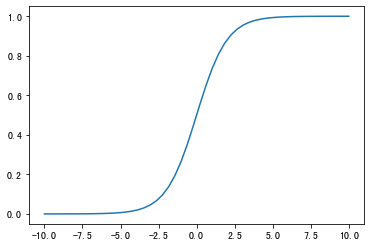

In [6]:
plt.plot(sub_x,sigmod(sub_x))

### Sigmod Curve
+ Population
+ work hard and salary
+ exerise and lossing weight
+ virus population

In [7]:
import random

In [8]:
def random_linear(x):
    k,b = random.normalvariate(0,1),random.normalvariate(0,1)
    
    return k*x+b

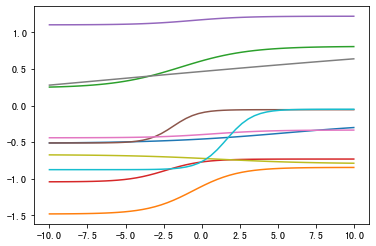

In [9]:
for i in range(10):
    plt.plot(sub_x,random_linear(sigmod(random_linear(sub_x))))

## 我们通过变换，可以得到各种各样的函数
## However,there are more complicated functions in our life

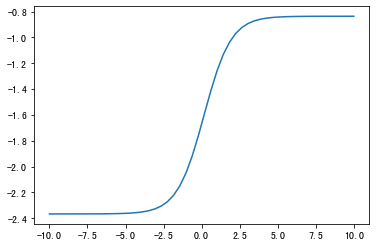

In [10]:
index = np.random.choice(range(len(sub_x)))
y = np.concatenate((random_linear(sigmod(random_linear(sub_x[:index]))),random_linear(sigmod(random_linear(sub_x[index:])))))

plt.plot(sub_x,y)

In [11]:
from matplotlib.animation import FuncAnimation

In [12]:
%matplotlib notebook

<IPython.core.display.Javascript object>


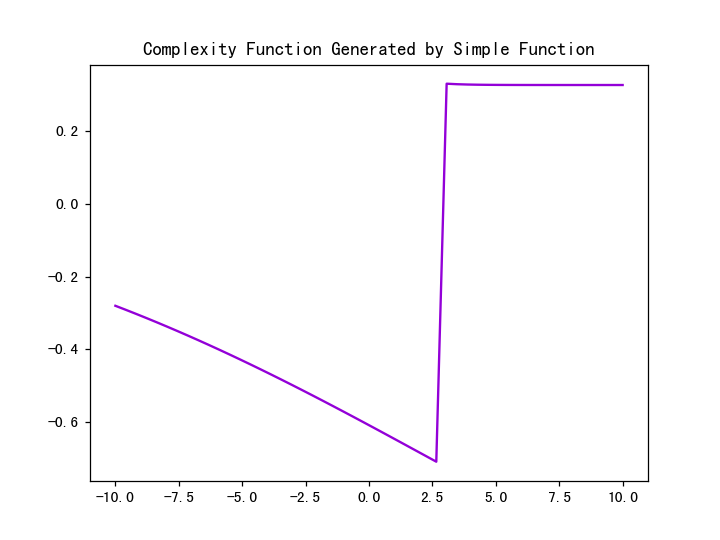

In [13]:
# 线性函数--> 复杂函数

def animate(i):
    fig.clear()
    index = np.random.choice(range(len(sub_x)))
    y = np.concatenate((random_linear(sigmod(random_linear(sub_x[:index]))),random_linear(sigmod(random_linear(sub_x[index:])))))
    plt.plot(sub_x,y,c=np.random.rand(3, ))
    plt.title('Complexity Function Generated by Simple Function')

fig = plt.gcf()
ani = FuncAnimation(fig,animate,interval=300)
plt.show()

## 使用基本的、简单的函数元素，我们就可以拟合非常非常多的复杂函数
### Something alike this
+ 一个蚂蚁是一个非常简单的物种，但是成千上万的蚂蚁就可以做很多复杂的事情
+ 我们的大脑！每一个神经元其实功能很有限，但是巨量的神经元组合在一起的时候，就可以做出来非常非常复杂的事情

## Geffery Hintion
## UCSD:在脑科学与认知实验室的时候发现，神经元之间连接（线性、非线性），每个神经元所做的事情很有限，大脑可以做很简单的变换做出很复杂的事情，提出可以在计算机里面，用一些简单的函数拼接起来，来激活我们的数据，激活函数，利用反向更新的方法，更新函数的权重

## Natural Network
+ 1.线性变换，kx+b
+ 2.非线性变换,sigmoid,非线性变换在神经网络里叫Activate neurons激活神经元，sigmoid就叫做激活函数

## 把线性函数kx+b和非线性函数sigmoid组成的系统叫做神经网络
### sigmoid是激活函数，激活函数的作用和意义是什么？
+ 线性函数的叠加还是线性函数，只有有了非线性函数的叠加才有可能处理非线性函数，现实生活中，大量的场景都是非线性的
+ 激活函数的作用和意义：让模型用来拟合非线性关系

## As we all know:通过线性变化和非线性变化（激活函数），我们理论上可以拟合出任意复杂的函数，那么为了得到这个值，我们要做的是什么呢?

In [14]:
from sklearn.datasets import load_boston

In [15]:
data = load_boston()

In [19]:
X_ = data['data'][:,5]
Y = data['target']

<IPython.core.display.Javascript object>


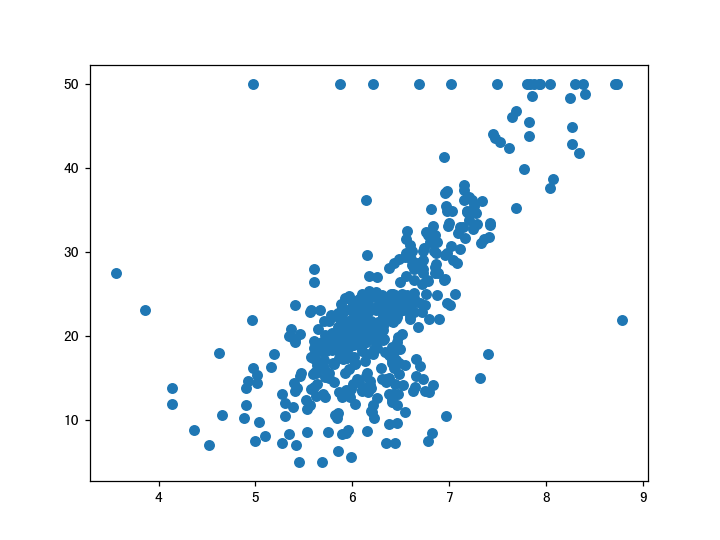

In [20]:
plt.scatter(X_,Y)

$f(x)=k_2*\frac{1}{1+e^{-(k_1*x+b_1)}}+b_2$,对于任意的一组$k_1,k_2,b_1,b_2$,可以唯一确定一条线，符合上边图像

根据loss函数定义$loss = \frac{1}{n}\sum{(y_i-\hat{y_i})^2} = \frac{1}{n}\sum{(y_i-[k_2*\frac{1}{1+e^{-(k_1*x+b_1)}}+b_2])^2}$

怎样获得$k_1,k_2,b_1,b_2$?求解$\frac{\partial{loss}}{\partial{k_1}},k_1+=\frac{\partial{loss}}{\partial{k_1}}*\alpha$可得，依此类推，可求得$k_2,b_1,b_2$

但是，对$loss = \frac{1}{n}\sum{(y_i-[k_2*\frac{1}{1+e^{-(k_1*x+b_1)}}+b_2])^2}$求偏导很难计算，深度学习最起码有三个线性非线性变换，会更复杂

loss函数太过复杂，无法求偏导，用梯度下降的方法无法再求得最小loss，怎么办？

现代深度学习框架、神经网络的核心内容：自动求导，TensorFlow，PyTorch都是

## 计算机怎么进行自动求导，获得每个参数的导数

首先需要计算机对这种关系有一个表征，假设：

+ $f(x)=k_2*\frac{1}{1+e^{-(k_1*x+b_1)}}+b_2$

+ $loss = \frac{1}{n}\sum{(y_i-[k_2*\frac{1}{1+e^{-(k_1*x+b_1)}}+b_2])^2}$

需要让计算机自动解决这个问题，首先要考虑怎么表示它，在计算机中用数据结构表示，对数据怎么做运算是算法，程序=数据结构+算法，现在的问题是怎么用数据结构表示这种关系？首先要在计算机中表示出来，计算机才有可能去计算它

$f(x)=k_2*\frac{1}{1+e^{-(k_1*x+b_1)}}+b_2$，$loss = \frac{1}{n}\sum{(y_i-[k_2*\frac{1}{1+e^{-(k_1*x+b_1)}}+b_2])^2}$运算过程如下：

$k_1*x+b_1=>linear01$

$\frac{1}{1+e^{-linear01}}=>sigmoid$

$k_2*sigmoid+b_2=>linear02$

$\frac{1}{n}\sum{(y_{true}-linear02)^2}=>loss$

在计算机中，描述这种连接关系，传播关系，叫做图Graph，可表示如下：
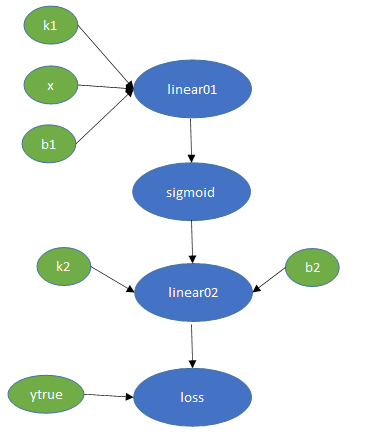

假设要求解$\frac{\partial{loss}}{\partial{k_1}},$找到上图$k_1==>loss$的路线$k_1=>linear01=>sigmoid=>linear02=>loss$，反向求偏导即可得到$\frac{\partial{loss}}{\partial{k_1}} = \frac{\partial{loss}}{\partial{linear02}}*\frac{\partial{linear02}}{\partial{sigmoid}}*\frac{\partial{sigmoid}}{\partial{linear01}}*\frac{\partial{linear01}}{\partial{k_1}}$

根据下列式可逐层求导可得：$\frac{\partial{loss}}{\partial{k_1}},$这种方法叫做链式求导Link Derivation

$loss = \frac{1}{n}\sum{(y_{true}-linear02)^2}$

$linear02 = k_2*sigmoid+b_2$

$sigmoid = \frac{1}{1+e^{-linear01}}$

$linear01 = k_1*x+b_1$

计算顺序？

In [138]:
# 使用变量避免打字错误导致图画错的情况，提升代码的可维护性

node_x, node_k1, node_b1 = 'x', 'k1', 'b1'
node_k2, node_b2 = 'k2', 'b2'
node_linear_01, node_linear_02, node_sigmoid = 'linear_01', 'linear_02', 'sigmoid'
node_loss,node_y_ture = 'loss','y_ture'

computing_graph = { # represent model 
    node_x: [node_linear_01],
    node_k1: [node_linear_01],
    node_b1: [node_linear_01],
    node_linear_01: [node_sigmoid],
    node_sigmoid: [node_linear_02],
    node_k2: [node_linear_02],
    node_b2: [node_linear_02],
    node_linear_02: [node_loss],
    node_y_ture:[node_loss],
}

In [139]:
import networkx as nx
# 每一次画出来的图，位置不一样，关系不变，这种在数学中叫做拓扑，研究相对关系，但具体位置不重要
# 用graph作为变量，可使得同一graph画出的图一致
graph = nx.DiGraph(computing_graph)
layout = nx.layout.spring_layout(graph)

In [140]:
%matplotlib inline

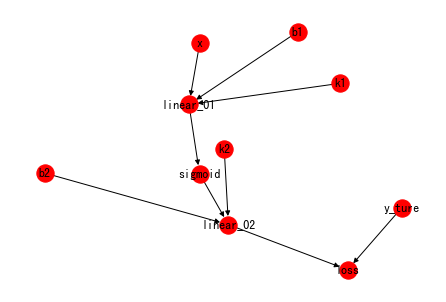

In [141]:
nx.draw(graph, layout, with_labels=True, node_color='red')

假设对所有的node去排序，按照什么顺序呢?

眼睛看到的顺序为：x,b1,k1,linear_01,sigmoid,b2,k2,linear_02,y_true,loss

假设已经知道了node的顺序，写出如下语句

In [142]:
visited_order = [node_x, node_b1, node_k1, node_linear_01, node_sigmoid, node_k2, node_b2, node_linear_02,node_y_ture, node_loss]

In [143]:
class Node:
    def __init__(self, name, inputs=[]):
        self.name = name
        self.inputs = inputs
        
        
    def forward(self):
        print('Get self value'.format(self))
        
    def __repr__(self):
        return self.name
    
class Placeholder(Node):
    def __init__(self, name):
        Node.__init__(self, name=name)
        
    def forward(self):
        print('::=>Get myself value by human being BABA')

class Operator(Node):
    def __init__(self, name, inputs=[]):
        Node.__init__(self, name=name, inputs=inputs)
        
    def forward(self):
        print('::=>Get myself value by caculate: {}'.format(self.inputs))

In [146]:
for node in visited_order:
    print(f'I am: {node}')
    Node.forward(node)

I am: x
Get self value
I am: b1
Get self value
I am: k1
Get self value
I am: linear_01
Get self value
I am: sigmoid
Get self value
I am: k2
Get self value
I am: b2
Get self value
I am: linear_02
Get self value
I am: y_ture
Get self value
I am: loss
Get self value


顺序不能随机放

给定的数据：x,b1,k1,b2,k2,y_true，算出来的值：linear_01,sigmoid,linear_02,

loss

In [125]:
class Node:
    def __init__(self, name, inputs=[]):
        self.name = name
        self.inputs = inputs
        
        
    def forward(self):
        print('Get self value'.format(self))
        
    def __repr__(self):
        return self.name
    
class Placeholder(Node):
    def __init__(self, name):
        Node.__init__(self, name=name)
        
    def forward(self):
        print('::=>Get myself value by human being BABA')

class Operator(Node):
    def __init__(self, name, inputs=[]):
        Node.__init__(self, name=name, inputs=inputs)
        
    def forward(self):
        print('::=>Get myself value by caculate: {}'.format(self.inputs))

In [207]:
visited_order = [node_x, node_b1, node_k1, node_linear_01, node_sigmoid, node_k2, node_b2, node_linear_02,node_y_ture, node_loss]

In [157]:
node_x = Placeholder('x')
node_k1 =  Placeholder('k1')
node_b1 = Placeholder('b1')
node_k2 = Placeholder('k2')
node_b2 = Placeholder('b2')
node_linear_01 = Operator('linear_01', inputs = [node_x,node_k1,node_b1])
node_sigmoid = Operator('sigmoid',inputs = [node_linear_01])
node_linear_02 = Operator('linear_02', inputs = [node_k2,node_b2,node_sigmoid])
node_y_ture = Placeholder('y_ture')
node_loss = Operator('loss',inputs = [node_y_ture,node_linear_02])

In [130]:
# 前馈网络，依据x,y以及参数，来获得一次loss
for node in visited_order:
    print(f'I am: {node}')
    node.forward()

I am: x
::=>Get myself value by human being BABA
I am: b1
::=>Get myself value by human being BABA
I am: k1
::=>Get myself value by human being BABA
I am: linear_01
::=>Get myself value by caculate: [x, k1, b1]
I am: sigmoid
::=>Get myself value by caculate: [linear_01]
I am: k2
::=>Get myself value by human being BABA
I am: b2
::=>Get myself value by human being BABA
I am: linear_02
::=>Get myself value by caculate: [k2, b2, sigmoid]
I am: y_ture
::=>Get myself value by human being BABA
I am: loss
::=>Get myself value by caculate: [y_ture, linear_02]


$\partial$

In [171]:
# backword

class Node:
    def __init__(self, name, inputs=[]):
        self.name = name
        self.inputs = inputs
        self.outputs = []
        
        for node in self.inputs:
            node.outputs.append(self)
        
    def forward(self):
        print('Get self value'.format(self))
        
    def backward(self):
        pass
        
    def __repr__(self):
        return self.name
    
class Placeholder(Node):
    def __init__(self, name):
        Node.__init__(self, name=name)
        
    def forward(self):
        print('::=>Get myself value by human being BABA')
        
    def backward(self):
        print('I get ∂loss/∂self from computer memory directly')

class Operator(Node):
    def __init__(self, name, inputs=[]):
        Node.__init__(self, name=name, inputs=inputs)
        
    def forward(self):
        print('::=>Get myself value by caculate: {}'.format(self.inputs))
        
    def backward(self):
        print('Get Gradients ∂loss/∂{}, save to MEMORY'.format(self.inputs))
        
        if self.outputs:
            for n in self.inputs:
                print('==:> ∂loss / ∂{} = ∂loss / ∂{} * ∂{} / ∂{}'.format(n,self,self,n))
        else:
            print('I am the final node')

In [211]:
visited_order = [node_x, node_b1, node_k1, node_linear_01, node_sigmoid, node_k2, node_b2, node_linear_02,node_y_ture, node_loss]

In [188]:
node_x = Placeholder('x')
node_k1 =  Placeholder('k1')
node_b1 = Placeholder('b1')
node_k2 = Placeholder('k2')
node_b2 = Placeholder('b2')
node_linear_01 = Operator('linear_01', inputs = [node_x,node_k1,node_b1])
node_sigmoid = Operator('sigmoid',inputs = [node_linear_01])
node_linear_02 = Operator('linear_02', inputs = [node_k2,node_b2,node_sigmoid])
node_y_ture = Placeholder('y_ture')
node_loss = Operator('loss',inputs = [node_y_ture,node_linear_02])

In [199]:
# 前馈网络，依据x,y以及参数，来获得一次loss
for node in visited_order:
    print(f'I am: {node}')
    node.forward()
    
print ('**'*18)

for step,node in enumerate(visited_order[::-1]):
    print(f'step {step} : I am {node}')
    node.backward()
    
print ('**'*18)

for node in visited_order:
    if isinstance(node, Placeholder):
#         print(node)
        print('Update node:{} value: node.value = node.value + (-1)* ∂loss / ∂{}'.format(node,node))

I am: x
::=>Get myself value by human being BABA
I am: b1
::=>Get myself value by human being BABA
I am: k1
::=>Get myself value by human being BABA
I am: linear_01
::=>Get myself value by caculate: [x, k1, b1]
I am: sigmoid
::=>Get myself value by caculate: [linear_01]
I am: k2
::=>Get myself value by human being BABA
I am: b2
::=>Get myself value by human being BABA
I am: linear_02
::=>Get myself value by caculate: [k2, b2, sigmoid]
I am: y_ture
::=>Get myself value by human being BABA
I am: loss
::=>Get myself value by caculate: [y_ture, linear_02]
************************************
step 0 : I am loss
Get Gradients ∂loss/∂[y_ture, linear_02]
I am the final node
step 1 : I am y_ture
I get ∂loss/∂self from computer memory directly
step 2 : I am linear_02
Get Gradients ∂loss/∂[k2, b2, sigmoid]
==:> ∂loss / ∂k2 = ∂loss / ∂linear_02 * ∂linear_02 / ∂k2
==:> ∂loss / ∂b2 = ∂loss / ∂linear_02 * ∂linear_02 / ∂b2
==:> ∂loss / ∂sigmoid = ∂loss / ∂linear_02 * ∂linear_02 / ∂sigmoid
step 3 : I a

## 这就是自动求导的内核

#### 前向：获得loss，反向：获得偏导
## TODO
+ forward calculate:function
+ backward:gradient
+ Get Order:

In [182]:
%matplotlib inline

['c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c']


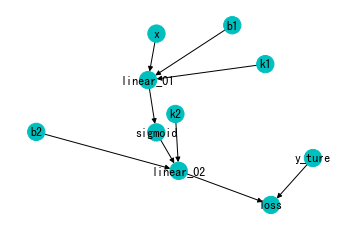

In [200]:
color = ['c','red']
before,changed = color

def animate(step):
    map_colors=[changed if node in visited_order[:step] else before for node in graph]
    print(map_colors)
    nx.draw(graph, layout, node_color=map_colors, with_labels=True)
    
ax = plt.gca()
fig = plt.gcf()
ani = FuncAnimation(fig,animate,interval=600)
plt.show()

In [209]:
%matplotlib notebook

<IPython.core.display.Javascript object>


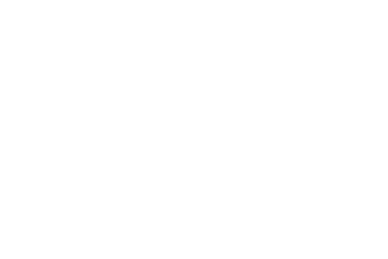

<IPython.core.display.Javascript object>


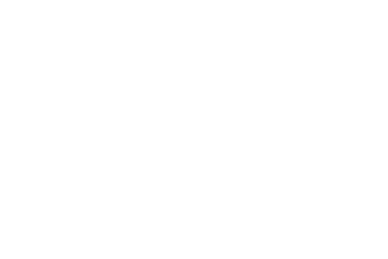

Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [212]:
color = ['c','red']
before,changed = color

def animate(step):
    map_colors=[changed if node in visited_order[::-1][:step] else before for node in graph]
    nx.draw(graph, layout, node_color=map_colors, with_labels=True)
    
ax = plt.gca()
fig = plt.gcf()
ani = FuncAnimation(fig,animate,interval=600)
plt.show()

问题，最后两个图不变颜色